## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.567014  1.118848 -0.888777  1.309617  1.350945  1.977713
1 -1.645961  1.623088  0.767472 -0.684829  1.309947 -1.016799
2  0.537443  1.396281 -0.693277  1.485743 -0.314005  1.445692
3 -1.532876 -0.679096  0.835346  0.474300  0.400277 -0.665133
4 -0.422269 -1.050405 -0.465054 -1.523279  1.514037 -1.276566


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9825489	total: 58.1ms	remaining: 58s
1:	learn: 0.9724713	total: 58.8ms	remaining: 29.3s
2:	learn: 0.9618552	total: 59.4ms	remaining: 19.7s
3:	learn: 0.9524466	total: 60.1ms	remaining: 15s
4:	learn: 0.9427011	total: 60.6ms	remaining: 12.1s
5:	learn: 0.9335979	total: 61.2ms	remaining: 10.1s
6:	learn: 0.9238792	total: 61.6ms	remaining: 8.74s
7:	learn: 0.9153520	total: 62.2ms	remaining: 7.71s
8:	learn: 0.9058471	total: 62.7ms	remaining: 6.9s
9:	learn: 0.8971912	total: 63.2ms	remaining: 6.25s
10:	learn: 0.8869906	total: 63.7ms	remaining: 5.72s
11:	learn: 0.8779394	total: 64.1ms	remaining: 5.28s
12:	learn: 0.8690777	total: 64.7ms	remaining: 4.91s
13:	learn: 0.8582549	total: 65.3ms	remaining: 4.6s
14:	learn: 0.8514923	total: 66ms	remaining: 4.33s
15:	learn: 0.8431329	total: 66.7ms	remaining: 4.1s
16:	learn: 0.8335732	total: 67.4ms	remaining: 3.9s
17:	learn: 0.8256718	total: 68ms	remaining: 3.71s
18:	learn: 0.8172822	total: 68.5ms	remaining: 3.54s
19:	

90:	learn: 0.4248450	total: 104ms	remaining: 1.04s
91:	learn: 0.4216303	total: 105ms	remaining: 1.03s
92:	learn: 0.4178939	total: 105ms	remaining: 1.03s
93:	learn: 0.4136421	total: 106ms	remaining: 1.02s
94:	learn: 0.4109527	total: 106ms	remaining: 1.01s
95:	learn: 0.4074028	total: 107ms	remaining: 1s
96:	learn: 0.4041336	total: 107ms	remaining: 997ms
97:	learn: 0.4011189	total: 108ms	remaining: 991ms
98:	learn: 0.3977846	total: 108ms	remaining: 983ms
99:	learn: 0.3939133	total: 109ms	remaining: 977ms
100:	learn: 0.3903107	total: 109ms	remaining: 969ms
101:	learn: 0.3876029	total: 109ms	remaining: 962ms
102:	learn: 0.3849279	total: 110ms	remaining: 956ms
103:	learn: 0.3820088	total: 110ms	remaining: 949ms
104:	learn: 0.3786101	total: 111ms	remaining: 944ms
105:	learn: 0.3760678	total: 111ms	remaining: 939ms
106:	learn: 0.3728829	total: 112ms	remaining: 932ms
107:	learn: 0.3701944	total: 112ms	remaining: 925ms
108:	learn: 0.3675619	total: 113ms	remaining: 920ms
109:	learn: 0.3642711	tot

253:	learn: 0.1266169	total: 187ms	remaining: 549ms
254:	learn: 0.1257061	total: 188ms	remaining: 549ms
255:	learn: 0.1250375	total: 188ms	remaining: 548ms
256:	learn: 0.1242408	total: 189ms	remaining: 546ms
257:	learn: 0.1236116	total: 190ms	remaining: 546ms
258:	learn: 0.1227151	total: 190ms	remaining: 544ms
259:	learn: 0.1220222	total: 191ms	remaining: 543ms
260:	learn: 0.1211384	total: 191ms	remaining: 542ms
261:	learn: 0.1203433	total: 192ms	remaining: 540ms
262:	learn: 0.1195123	total: 192ms	remaining: 539ms
263:	learn: 0.1187847	total: 193ms	remaining: 537ms
264:	learn: 0.1178133	total: 193ms	remaining: 535ms
265:	learn: 0.1169636	total: 194ms	remaining: 534ms
266:	learn: 0.1160737	total: 194ms	remaining: 533ms
267:	learn: 0.1153164	total: 195ms	remaining: 532ms
268:	learn: 0.1145209	total: 195ms	remaining: 531ms
269:	learn: 0.1137614	total: 196ms	remaining: 529ms
270:	learn: 0.1129610	total: 196ms	remaining: 528ms
271:	learn: 0.1122753	total: 197ms	remaining: 526ms
272:	learn: 

422:	learn: 0.0470546	total: 282ms	remaining: 385ms
423:	learn: 0.0467755	total: 283ms	remaining: 384ms
424:	learn: 0.0464519	total: 283ms	remaining: 383ms
425:	learn: 0.0463171	total: 284ms	remaining: 382ms
426:	learn: 0.0460797	total: 284ms	remaining: 382ms
427:	learn: 0.0457987	total: 285ms	remaining: 381ms
428:	learn: 0.0455354	total: 285ms	remaining: 380ms
429:	learn: 0.0452275	total: 286ms	remaining: 379ms
430:	learn: 0.0450731	total: 286ms	remaining: 378ms
431:	learn: 0.0449238	total: 287ms	remaining: 377ms
432:	learn: 0.0447467	total: 287ms	remaining: 376ms
433:	learn: 0.0445213	total: 288ms	remaining: 375ms
434:	learn: 0.0442704	total: 288ms	remaining: 374ms
435:	learn: 0.0439755	total: 289ms	remaining: 373ms
436:	learn: 0.0438014	total: 289ms	remaining: 373ms
437:	learn: 0.0435127	total: 290ms	remaining: 372ms
438:	learn: 0.0433352	total: 290ms	remaining: 371ms
439:	learn: 0.0431605	total: 291ms	remaining: 370ms
440:	learn: 0.0429900	total: 291ms	remaining: 369ms
441:	learn: 

584:	learn: 0.0246083	total: 364ms	remaining: 258ms
585:	learn: 0.0245232	total: 364ms	remaining: 257ms
586:	learn: 0.0244257	total: 365ms	remaining: 257ms
587:	learn: 0.0243426	total: 366ms	remaining: 256ms
588:	learn: 0.0242472	total: 367ms	remaining: 256ms
589:	learn: 0.0241537	total: 368ms	remaining: 255ms
590:	learn: 0.0240568	total: 368ms	remaining: 255ms
591:	learn: 0.0239648	total: 368ms	remaining: 254ms
592:	learn: 0.0238734	total: 369ms	remaining: 253ms
593:	learn: 0.0237854	total: 369ms	remaining: 252ms
594:	learn: 0.0236927	total: 370ms	remaining: 252ms
595:	learn: 0.0236165	total: 370ms	remaining: 251ms
596:	learn: 0.0234749	total: 371ms	remaining: 250ms
597:	learn: 0.0234016	total: 371ms	remaining: 249ms
598:	learn: 0.0232923	total: 372ms	remaining: 249ms
599:	learn: 0.0231853	total: 372ms	remaining: 248ms
600:	learn: 0.0230987	total: 373ms	remaining: 247ms
601:	learn: 0.0230138	total: 373ms	remaining: 247ms
602:	learn: 0.0229701	total: 373ms	remaining: 246ms
603:	learn: 

781:	learn: 0.0115143	total: 464ms	remaining: 129ms
782:	learn: 0.0114616	total: 465ms	remaining: 129ms
783:	learn: 0.0114141	total: 466ms	remaining: 128ms
784:	learn: 0.0113697	total: 466ms	remaining: 128ms
785:	learn: 0.0113233	total: 466ms	remaining: 127ms
786:	learn: 0.0112798	total: 467ms	remaining: 126ms
787:	learn: 0.0112421	total: 467ms	remaining: 126ms
788:	learn: 0.0111845	total: 468ms	remaining: 125ms
789:	learn: 0.0111501	total: 468ms	remaining: 125ms
790:	learn: 0.0111075	total: 469ms	remaining: 124ms
791:	learn: 0.0110989	total: 470ms	remaining: 123ms
792:	learn: 0.0110541	total: 470ms	remaining: 123ms
793:	learn: 0.0109981	total: 471ms	remaining: 122ms
794:	learn: 0.0109622	total: 472ms	remaining: 122ms
795:	learn: 0.0109537	total: 472ms	remaining: 121ms
796:	learn: 0.0108901	total: 473ms	remaining: 120ms
797:	learn: 0.0108491	total: 473ms	remaining: 120ms
798:	learn: 0.0108408	total: 474ms	remaining: 119ms
799:	learn: 0.0108326	total: 474ms	remaining: 119ms
800:	learn: 

930:	learn: 0.0071473	total: 546ms	remaining: 40.5ms
931:	learn: 0.0071154	total: 547ms	remaining: 39.9ms
932:	learn: 0.0070802	total: 547ms	remaining: 39.3ms
933:	learn: 0.0070730	total: 548ms	remaining: 38.7ms
934:	learn: 0.0070461	total: 549ms	remaining: 38.1ms
935:	learn: 0.0070144	total: 549ms	remaining: 37.5ms
936:	learn: 0.0070081	total: 550ms	remaining: 36.9ms
937:	learn: 0.0069817	total: 550ms	remaining: 36.4ms
938:	learn: 0.0069518	total: 551ms	remaining: 35.8ms
939:	learn: 0.0069280	total: 551ms	remaining: 35.2ms
940:	learn: 0.0068973	total: 551ms	remaining: 34.6ms
941:	learn: 0.0068718	total: 552ms	remaining: 34ms
942:	learn: 0.0068429	total: 552ms	remaining: 33.4ms
943:	learn: 0.0068027	total: 553ms	remaining: 32.8ms
944:	learn: 0.0067730	total: 553ms	remaining: 32.2ms
945:	learn: 0.0067485	total: 553ms	remaining: 31.6ms
946:	learn: 0.0067279	total: 554ms	remaining: 31ms
947:	learn: 0.0067075	total: 554ms	remaining: 30.4ms
948:	learn: 0.0066902	total: 555ms	remaining: 29.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

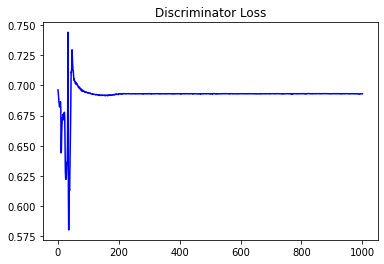

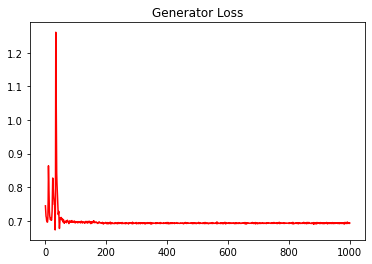

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0998925026162863


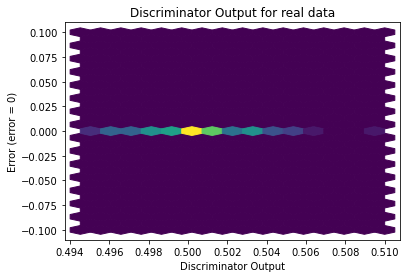

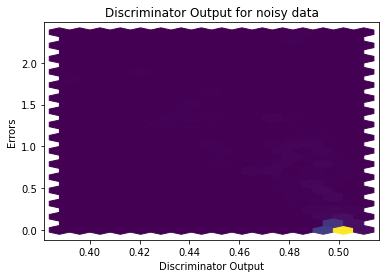

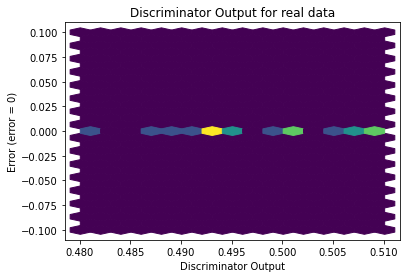

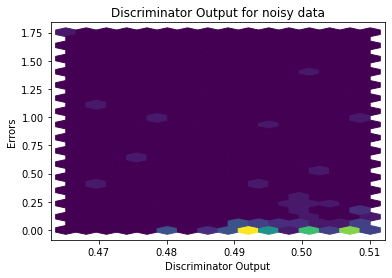

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


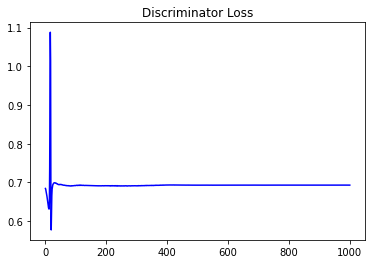

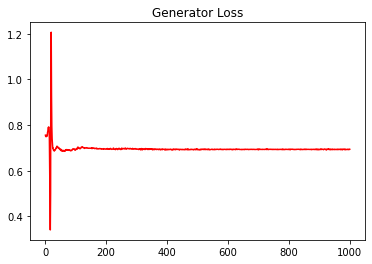

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09824078616532865


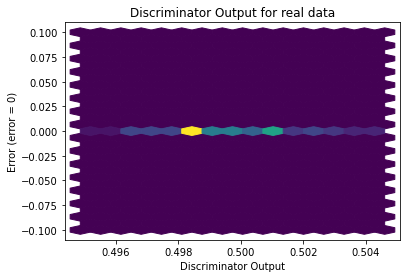

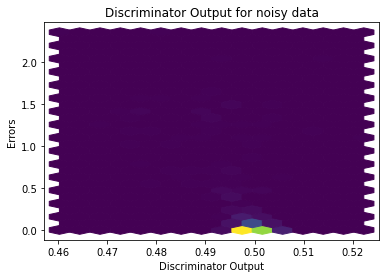

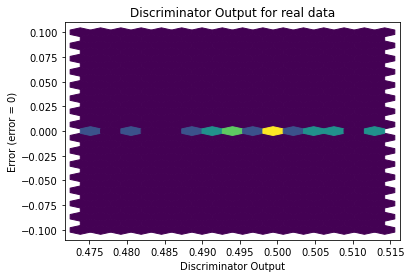

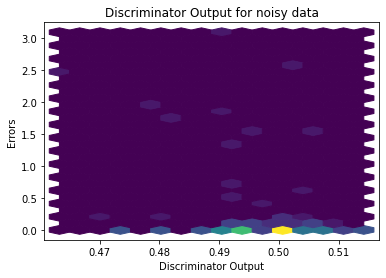

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0820]], requires_grad=True)
